# Calculating the Confidence Interval for stock returns

In [73]:
import pandas as pd
import numpy as np
from scipy.stats import norm

In [74]:
# Load one year worth of Sony (6758.T) stock data (open/close/traded)
sony = pd.read_csv('data/sony-july-2018-july-2019.csv')
sony['DATE'] = pd.to_datetime(sony['DATE'], format='%Y-%m-%d')
sony.describe()

,OPEN_PRICE,DAILY_HIGH,DAILY_LOW,CLOSE_PRICE,TRADED_VOLUME,ADJUSTED_CLOSE_PRICE
count,260.000000,260.000000,260.000000,260.000000,2.600000e+02,260.000000
mean,5658.200000,5714.796154,5597.342308,5655.657692,7.158330e+06,5655.657692
std,495.892548,499.951110,490.490931,494.526842,3.377836e+06,494.526842
min,4550.000000,4638.000000,4507.000000,4630.000000,2.799300e+06,4630.000000
25%,5299.750000,5367.250000,5277.750000,5323.250000,5.026275e+06,5323.250000
50%,5622.500000,5690.000000,5559.500000,5623.500000,6.554000e+06,5623.500000
75%,6008.250000,6042.000000,5955.500000,5985.750000,7.897525e+06,5985.750000
max,6930.000000,6973.000000,6845.000000,6966.000000,2.728210e+07,6966.000000


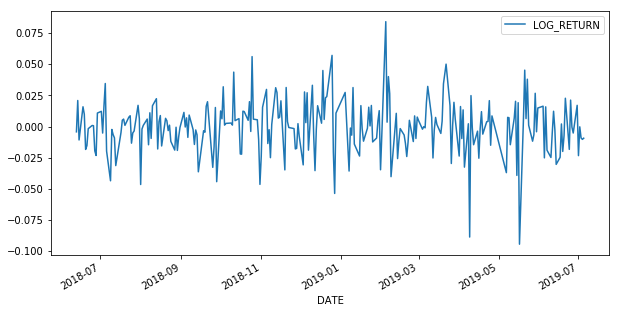

In [75]:
sony['LOG_RETURN'] = np.log(sony['CLOSE_PRICE'].shift(1)) - np.log(sony['CLOSE_PRICE'])
sony.plot(x='DATE', y='LOG_RETURN', figsize=(10,5))

## Build 95% confidence interval for log return

In [76]:
confidence_level = 0.95

In [77]:
alpha = 1 - confidence_level

sample_size = sony['LOG_RETURN'].shape[0]
sample_mean = sony['LOG_RETURN'].mean()
sample_std = sony['LOG_RETURN'].std(ddof=1) / sample_size**0.5

# left and right quaniles of the distribution
z_left = norm.ppf(alpha/2)
z_right = norm.ppf(1. - alpha/2)

# upper and lower bound
interval_left = sample_mean + sample_std*z_left
interval_right = sample_mean + sample_std*z_right

In [78]:
print(f'Log return is in inferred to be in range [{interval_left:.5f}, {interval_right:.5f}] with confidence {confidence_level * 100.}')

Log return is in inferred to be in range [-0.00291, 0.00227] with confidence 95.0
